In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import imread,subplot,imshow,show
import os
import re

In [2]:
path_img = '/kaggle/input/automatic-image-captioning-for-visually-impaired/visuallyimpair/visual_dataset/'
path_train = '/kaggle/input/automatic-image-captioning-for-visually-impaired/visuallyimpair/visual_text/visual.trainImages.txt'
path_token = '/kaggle/input/automatic-image-captioning-for-visually-impaired/visuallyimpair/visual_text/visual.token.txt'
path_test = '/kaggle/input/automatic-image-captioning-for-visually-impaired/visuallyimpair/visual_text/visual.testImages.txt'

In [3]:
names = ['image', 'caption']
df = pd.read_csv(path_token, sep='#',names = names)
df.caption = df.caption.apply(lambda x : re.sub('[0-9]\t','',x))
df.head()

,image,caption
0,greensig1.jpg,Green signal please walk .
1,greensig1.jpg,Green signal please walk .
2,greensig1.jpg,Green signal please walk .
3,greensig1.jpg,Green signal please walk .
4,greensig1.jpg,Green signal please walk .


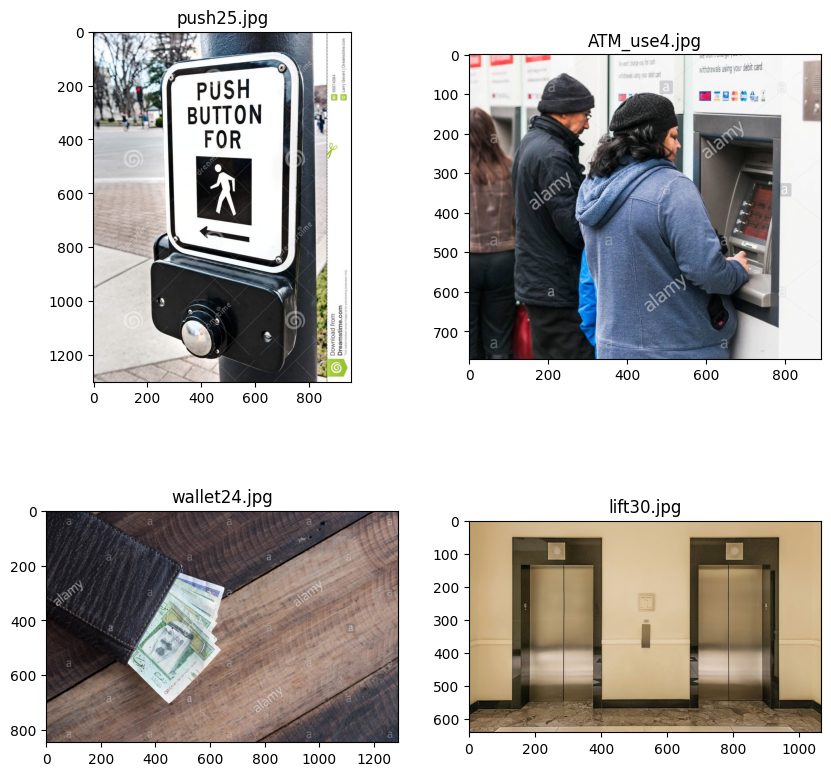

In [4]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax = ax.flatten()
def show_img():
    sample_images = df.image.sample(n=4)
    for i, image_filename in enumerate(sample_images):
        image = imread(os.path.join(path_img, image_filename))
        ax[i].imshow(image)
        ax[i].set_title(f"{image_filename}") 
    plt.show()
show_img()

In [5]:
pip install googletrans==3.1.0a0

  Preparing metadata (setup.py) ... - \ | done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.3 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16352 sha256=5e5c1d097dc4b23ef44da2d89d5afd21e58f2ae2fc7ddd8e25bb42830d4356c3
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans
  Attempting uninstall: h11
    Found existing installation: h11 0.14.0
    Uninstalling h11-0.14.0:

In [6]:
from googletrans import Translator
translator = Translator(service_urls=['translate.googleapis.com'])
def translate(str):
    translation = translator.translate(str, dest='vi')
    return translation.text

In [7]:
from tqdm import tqdm, tqdm_notebook
tqdm_notebook().pandas()

/tmp/ipykernel_24/1291952632.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  tqdm_notebook().pandas()


0it [00:00, ?it/s]

In [8]:
df['caption'] = df['caption'].progress_apply(lambda x : translate(x))

  0%|          | 0/8000 [00:00<?, ?it/s]

In [9]:
df.head()

,image,caption
0,greensig1.jpg,Tín hiệu xanh vui lòng đi bộ.
1,greensig1.jpg,Tín hiệu xanh vui lòng đi bộ.
2,greensig1.jpg,Tín hiệu xanh vui lòng đi bộ.
3,greensig1.jpg,Tín hiệu xanh vui lòng đi bộ.
4,greensig1.jpg,Tín hiệu xanh vui lòng đi bộ.


In [10]:
df.to_csv('data.csv')

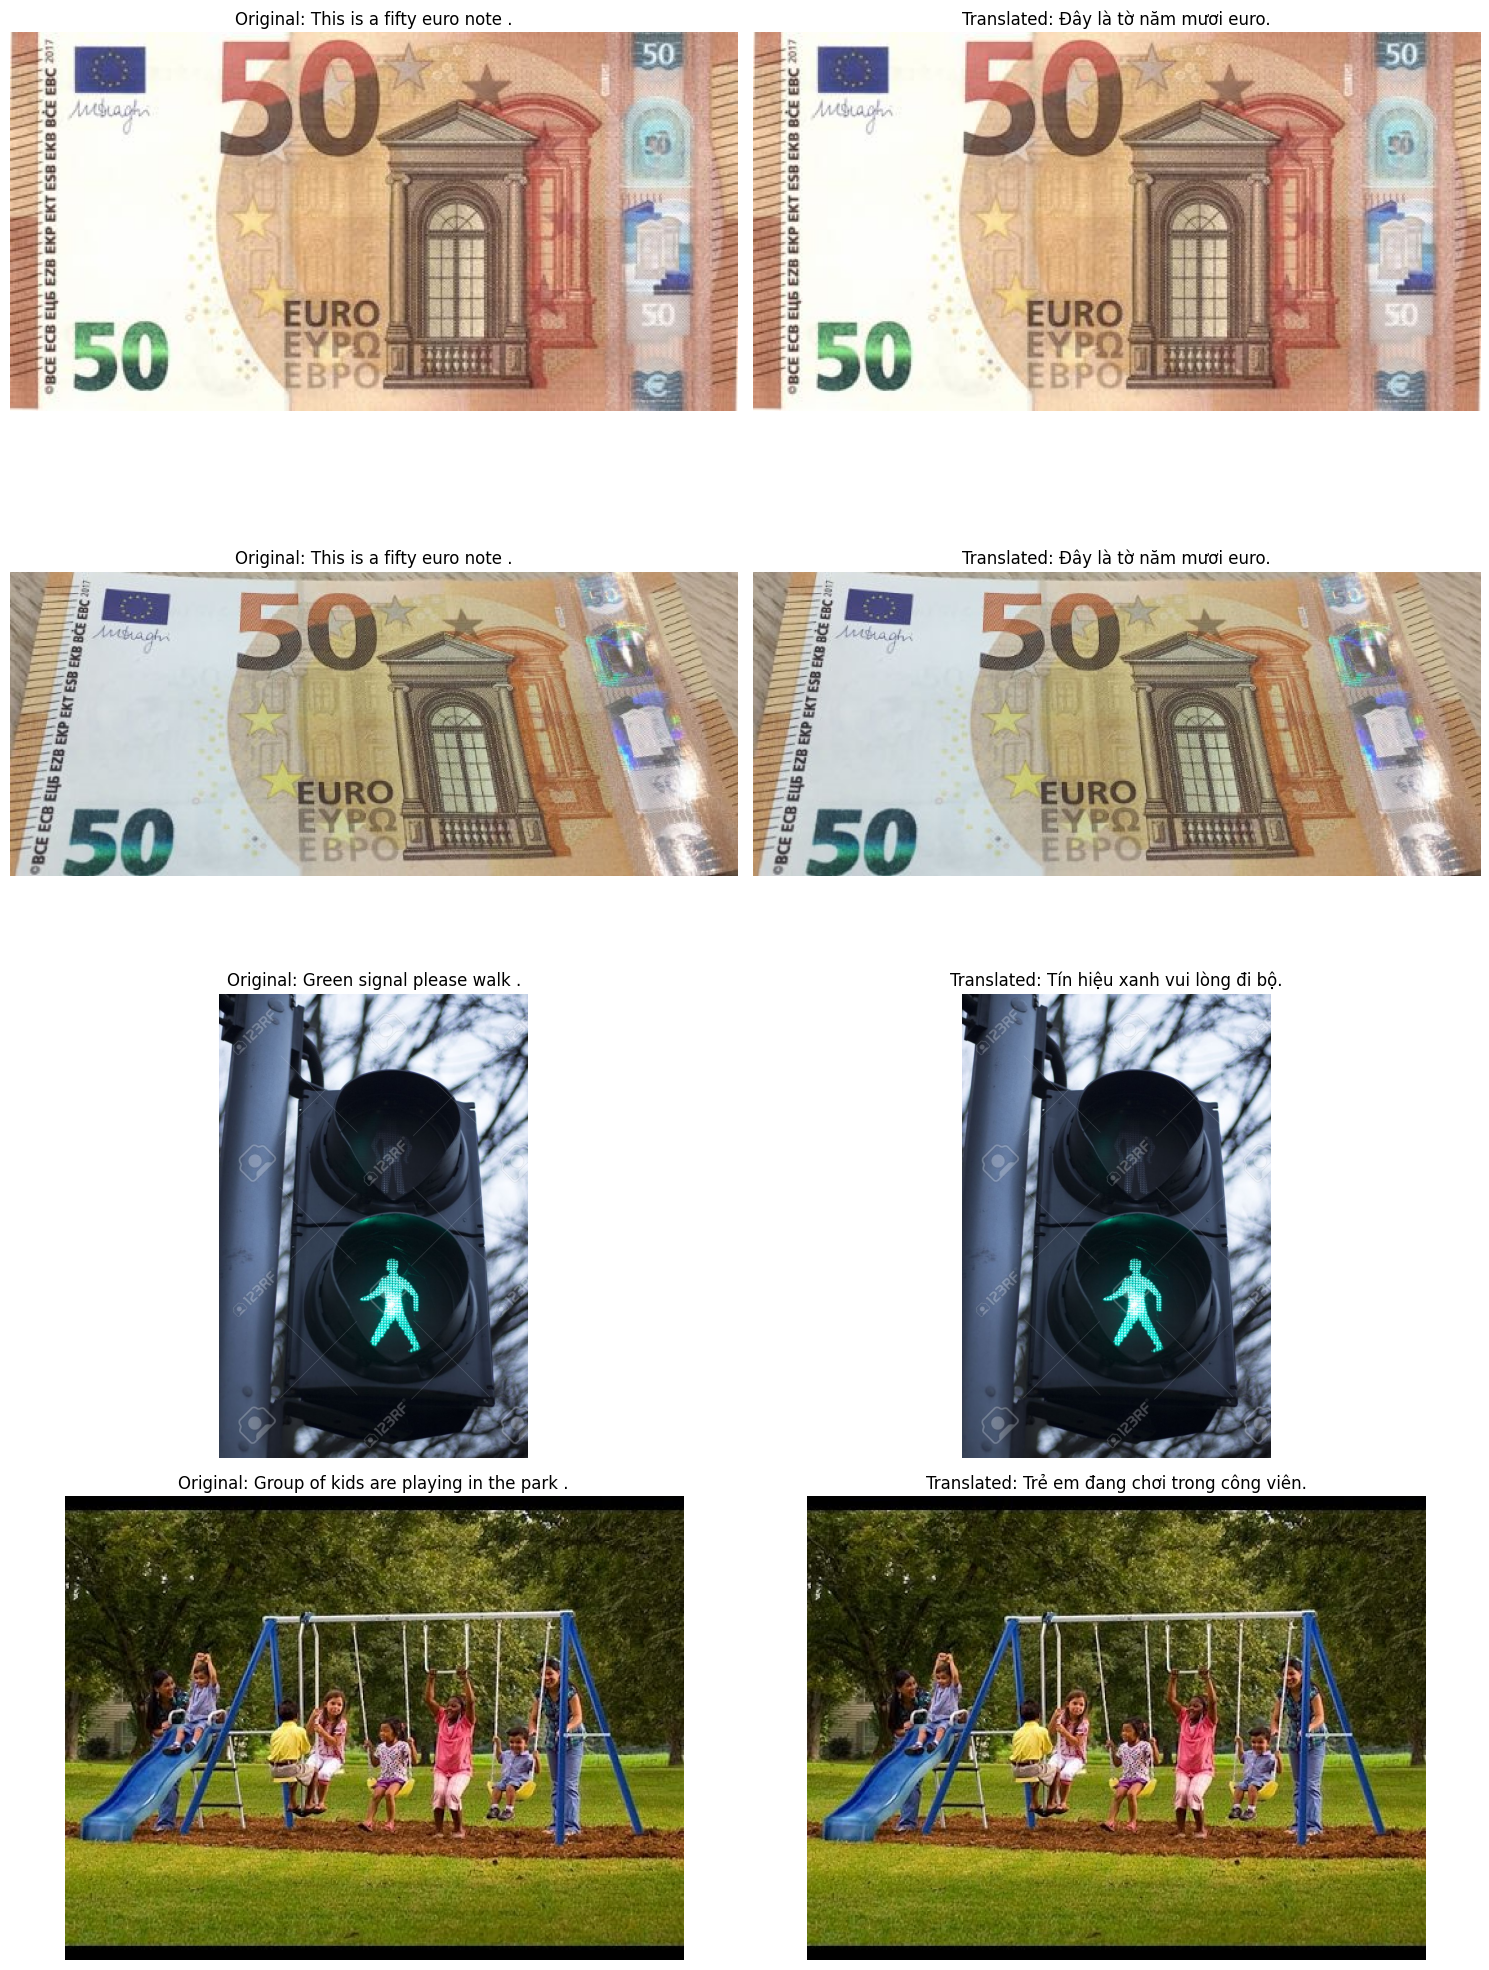

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import imread
import os
import re

# Đường dẫn tới các tệp dữ liệu
path_img = '/kaggle/input/automatic-image-captioning-for-visually-impaired/visuallyimpair/visual_dataset/'
path_token = '/kaggle/input/automatic-image-captioning-for-visually-impaired/visuallyimpair/visual_text/visual.token.txt'

# Đọc tệp token
names = ['image', 'caption']
df = pd.read_csv(path_token, sep='#', names=names)
df.caption = df.caption.apply(lambda x: re.sub('[0-9]\t', '', x))

# Giả sử bạn đã có dataframe trans_df với các caption đã được dịch
trans_df = df.copy()
trans_df['caption'] = df['caption'].apply(lambda x: translate(x))

# Hiển thị ảnh và caption trước và sau khi dịch
fig, ax = plt.subplots(4, 2, figsize=(15, 20))
ax = ax.flatten()

def show_img():
    sample_images = df.sample(n=4).reset_index(drop=True)
    for i, row in sample_images.iterrows():
        image_filename = row['image']
        original_caption = row['caption']
        translated_caption = trans_df.loc[trans_df['image'] == image_filename, 'caption'].values[0]
        image = imread(os.path.join(path_img, image_filename))
        
        ax[2*i].imshow(image)
        ax[2*i].set_title(f"Original: {original_caption}")
        ax[2*i].axis('off')
        
        ax[2*i + 1].imshow(image)
        ax[2*i + 1].set_title(f"Translated: {translated_caption}")
        ax[2*i + 1].axis('off')
    
    plt.tight_layout()
    plt.show()

show_img()
